# Data Exploratory Analysis 

### Bird proportion by food and weather conditions

The initial analysis focused on comparing the distribution of bird species in relation to available food types and prevailing weather conditions at the observation points. To achieve this, a cross-tabulation between bird species and these variables was performed. The results were then normalized to account for variations in category frequencies within the variables. Subsequently, we visualized the proportions of bird species observed under different conditions using stacked bar charts.

Overall, the analysis revealed that Bird 6 is the most frequently observed species, followed by Bird 10. Bird 3, 9, and 11 also make appearances in the dataset, albeit in smaller numbers. Most other species appear to have minimal or no representation in the observed proportions of birds.

Upon a closer examination of the results based on individual factors:

   - **Food**: The proportions of Birds 9 and 10 fluctuate slightly amongst the three food but remain relatively consistent. Bird 6 has a lower proportion in observations when Feed 1 is available compared to its proportion in presence of Feed 2 and 3, although its proportion remains consistently high. Bird 3, on the other hand, appears to primarily visit the feeding station when Feed 1 is provided. This suggests that the presence of Feed 1 may elevate the proportion of Bird 3 at the expense of Bird 6. Aditionally, Bird 8 was only observed in presence of Feed 2 while Bird 11 is absent. 

   - **Weather**: Notably, Bird 6 is absent in snowy conditions, despite its prominence in all other weather scenarios.  In contrast, Bird 9's presence substantially increases in snowy conditions. However, since only 5 observations in the dataframe were done in snowy conditions, the data is not enough to draw any conclusions. Birds 10 and 3's observations are comparatively lower in foggy conditions. Again, only 41 observations were done in foggy conditions, thus this results have to be looked at carefully. In all other weather conditions, which have a higher representation in the dataframe,  the proportion of birds fluctuate but remain relatively consistent.

   - **Wind**: The strength of the wind does not seem to significantly influence the proportions of bird species.

   - **Rain**: In rainy conditions a dramatic reduction in the proportion of Bird 6 can be observed, with Bird 10 and Bird 9 becoming more prominent. Birds 3 and 11 proportion are also lower in rainy condition altough the difference is less prominent. However, only 49 out of the +6000 observations in the dataframe where done with rain, so the data is less reliable than without rain.

In [2]:
# Import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc
import numpy as np
from scipy.stats import pearsonr
import matplotlib.ticker as mtick
import pickle

# Load DataFrame from pickle
with open('df.pkl', 'rb') as file:
    df = pickle.load(file)

display(df.head())
df.info()

,bird,food,weight,temperature,weather,rain,wind,eats,duration,food_taken,observation_dt,feeding_dt,feeding_timegap
0,Bird 10,Feed 1,55.5,23,sunny,False,light,True,26,False,2017-08-08 08:09:00,2017-08-05 14:25:00,2 days 17:44:00
1,Bird 10,Feed 1,55.5,23,sunny,False,light,True,26,False,2017-08-08 08:09:00,2017-08-05 14:25:00,2 days 17:44:00
2,Bird 10,Feed 1,55.5,23,sunny,False,light,True,26,False,2017-08-08 08:09:00,2017-08-05 14:25:00,2 days 17:44:00
3,Bird 10,Feed 1,55.5,23,sunny,False,light,True,26,False,2017-08-08 08:09:00,2017-08-05 14:25:00,2 days 17:44:00
4,Bird 10,Feed 1,55.5,22,sunny,False,light,True,1,False,2017-08-09 08:08:00,2017-08-05 14:25:00,3 days 17:43:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6352 entries, 0 to 6351
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   bird             6352 non-null   category       
 1   food             6352 non-null   category       
 2   weight           6352 non-null   float64        
 3   temperature      6352 non-null   int64          
 4   weather          6352 non-null   category       
 5   rain             6352 non-null   bool           
 6   wind             6352 non-null   category       
 7   eats             6352 non-null   bool           
 8   duration         6352 non-null   int32          
 9   food_taken       6352 non-null   bool           
 10  observation_dt   6352 non-null   datetime64[ns] 
 11  feeding_dt       6352 non-null   datetime64[ns] 
 12  feeding_timegap  6352 non-null   timedelta64[ns]
dtypes: bool(3), category(4), datetime64[ns](2), float64(1), int32(1), int64(1), ti

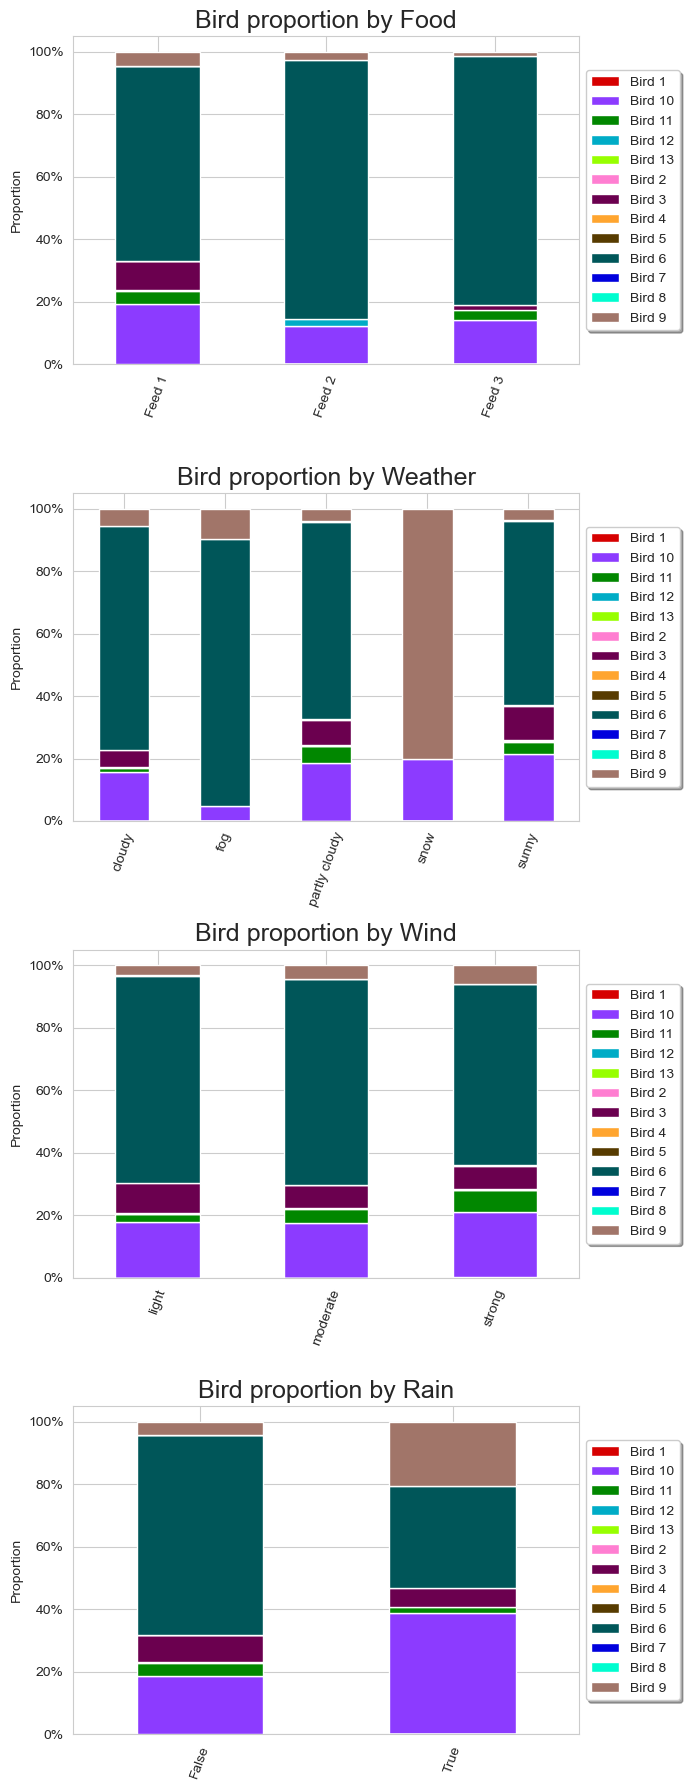

partly cloudy    3119
sunny            1990
cloudy           1197
fog                41
snow                5
Name: weather, dtype: int64

False    6303
True       49
Name: rain, dtype: int64

In [3]:
# List of categorical variables
categorical_variables = ['food', 'weather', 'wind', 'rain']

# Set Seaborn style and color palette
sns.set_style("whitegrid")
sns.set_palette(cc.glasbey, n_colors=13)

# Create a 4x1 grid of subplots
fig, axes = plt.subplots(4, 1, figsize=(7, 18))

# Loop through each categorical variable
for i, categorical_variable in enumerate(categorical_variables):
    # Create a cross-tabulation for the current variable
    cross_tab = pd.crosstab(df[categorical_variable], df['bird'], normalize='index')
    
    # Create a bar plot on the current subplot
    cross_tab.plot(kind='bar', stacked=True, ax=axes[i])
    
    # Set subplot settings
    axes[i].set_ylabel("Proportion")
    axes[i].set_xlabel(None)
    axes[i].set_title(f"Bird proportion by {categorical_variable.capitalize()}", fontsize=18)
    axes[i].legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True, ncol=1)
    axes[i].tick_params(axis='x', rotation=70)
    axes[i].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

# Adjust subplot layout to prevent overlapping labels and display figure
plt.tight_layout()
plt.show()# Create a cross-tabulation with temperature_category and bird, normalized by row

display(df.weather.value_counts())
display(df.rain.value_counts())

### Bird proportion by temperature

The analysis involved visualizing bird species observations across various temperature ranges using a stacked bar chart. The results reveal interesting patterns:

   - Birds 9 and 10 exhibit relatively consistent proportions across all temperature ranges.
   - Conversely, Birds 11 and 3 are notably scarce at temperatures below 10°C but become more prevalent as temperatures rise. Bird 3, in particular, shows a pronounced presence at temperatures exceeding 35°C. This trend may be attributed to migration patterns, with these birds frequenting the feeding station primarily during warmer seasons.
   - Bird 6, on the other hand, appears to have a reduced presence at the feeding station as temperatures increase, especially compared to Birds 11 and 3. This could not only be due to temperature but also with interaction between bird species.


In [4]:
# Define the temperature ranges and corresponding labels
temperature_bins = [-float('inf'), 0, 5, 10, 15, 20, 25, 30, 35, float('inf')]
temperature_labels = ['Below 0 °C', '0-5 °C', '5-10 °C','10-15 °C', '15-20 °C','20-25 °C', '25-30 °C', '30-35 °C', '+35 °C']

# Use pd.cut to categorize temperatures into bins and assign labels
df['temperature_category'] = pd.cut(df['temperature'], bins=temperature_bins, labels=temperature_labels)

# Display the DataFrame
display(df.head())

,bird,food,weight,temperature,weather,rain,wind,eats,duration,food_taken,observation_dt,feeding_dt,feeding_timegap,temperature_category
0,Bird 10,Feed 1,55.5,23,sunny,False,light,True,26,False,2017-08-08 08:09:00,2017-08-05 14:25:00,2 days 17:44:00,20-25 °C
1,Bird 10,Feed 1,55.5,23,sunny,False,light,True,26,False,2017-08-08 08:09:00,2017-08-05 14:25:00,2 days 17:44:00,20-25 °C
2,Bird 10,Feed 1,55.5,23,sunny,False,light,True,26,False,2017-08-08 08:09:00,2017-08-05 14:25:00,2 days 17:44:00,20-25 °C
3,Bird 10,Feed 1,55.5,23,sunny,False,light,True,26,False,2017-08-08 08:09:00,2017-08-05 14:25:00,2 days 17:44:00,20-25 °C
4,Bird 10,Feed 1,55.5,22,sunny,False,light,True,1,False,2017-08-09 08:08:00,2017-08-05 14:25:00,3 days 17:43:00,20-25 °C


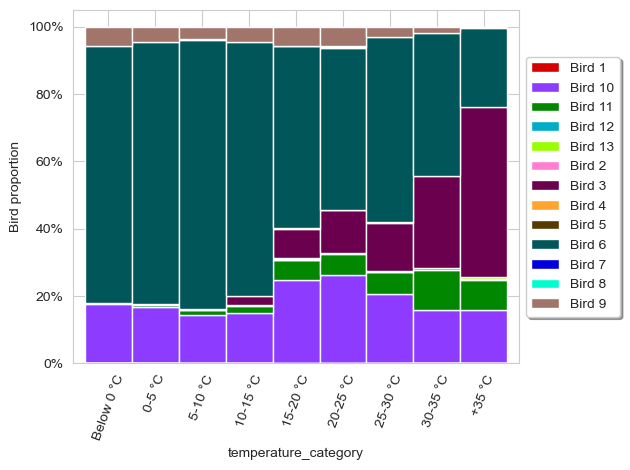

In [5]:
# Create a cross-tabulation with temperature_category and bird, normalized by row
cross_tab = pd.crosstab(df['temperature_category'], df['bird'], normalize='index')

# Set the color palette for the plot
sns.set_palette(cc.glasbey, n_colors=13)

# Create a stacked bar plot
ax = cross_tab.plot(kind='bar', stacked=True, width=1)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

# # Set plot settings
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True, ncol=1)
plt.ylabel("Bird proportion")
plt.xticks(rotation=70)

# Adjust plot to layout and display
plt.tight_layout()
plt.show()


### Relationship Between Temperature and Duration at Feeding Station 

The following analysis aimed to ascertain whether temperature plays a role in determining the duration of bird stays at the feeding station. To investigate this topic, a linear regression analysis was conducted, charting temperature against duration. Prior to analysis, a logarithmic transformation was applied to the duration values to mitigate the influence of exceptionally long durations present in the dataset.

Upon scrutinizing the resulting plot and computing the Pearson R coefficient (-0.17), it was determined that there is no significant linear correlation between temperature and bird duration at the feeding station. It is worth noting that this analysis exclusively considers linear relationships and does not account for potential non-linear associations. Further investigation may be warranted to explore more complex relationships between these variables.

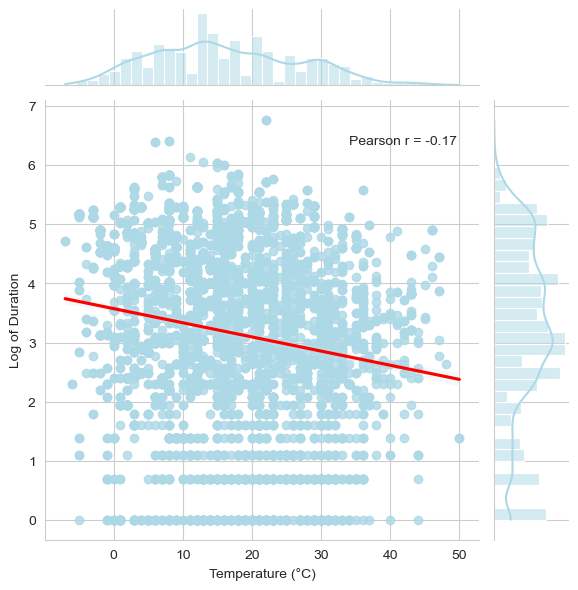

In [6]:
# Create a joint plot with regression line
g = sns.jointplot(df, x='temperature', y=np.log(df['duration']), kind='reg', color='lightblue')

# Calculate Pearson correlation coefficient between temperature and log(duration)
pearson_corr, _ = pearsonr(df['temperature'], np.log(df['duration']))

# Add Pearson correlation coefficient as text to the plot
g.ax_joint.annotate(f'Pearson r = {pearson_corr:.2f}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10)

# Change the color of the regression line to red
regline = g.ax_joint.get_lines()[0]
regline.set_color('red')

# Set y-label and x-label for the joint plot
g.ax_joint.set_ylabel('Log of Duration')
g.ax_joint.set_xlabel('Temperature (°C)')

# Display the plot
plt.show()


### Time spent at the Feeding Station by Bird Species

The distribution of time spent at the feeding station (stored in the duration column) by each bird species was depicted using a boxplot to examine potential behaviour differences between species. Only birds that were observed more than 20 times at the feeding station were included in this analysis. The boxplot indicated that while the duration time is similar for most examined birds, Bird 6 tends to spend a longer amount of time at the feeding station.  

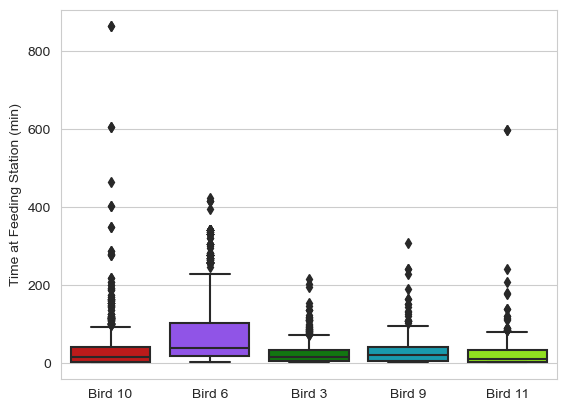

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Filter the DataFrame to include only birds with enough observations
min_observation_count = 20
df_copy = df.copy()
df_copy['bird'] = df_copy['bird'].astype('string')
filtered_df = df_copy[df_copy['bird'].map(df['bird'].value_counts()) > min_observation_count]

# Create the boxplot using the filtered DataFrame
sns.boxplot(data=filtered_df, x="bird", y='duration')
plt.ylabel("Time at Feeding Station (min)")
plt.xlabel(None)
plt.show()

### Bird observations at Feeding Station Over time

An analysis of bird observations at our feeding station over a period of time was conducted to explore potential trends in bird visits. This analysis included tracking the total number of observations for each bird during each feeding instance, as well as incorporating the mean temperature recorded during these observations.

Here are our key observations:

   - Bird 6 and Bird 10: These two bird species were the most commonly observed at the feeding station. Surprisingly, their visits remained relatively constant over time and did not appear to be strongly influenced by temperature fluctuations.

   - Bird 11: Bird 11 began visiting the feeding station in early April and continued to do so consistently until mid-July. This suggests a distinct pattern of behavior in which this bird species is more active during this time frame.

   - Bird 3: In contrast to Bird 11, Bird 3 started visiting the feeding station later in our recorded observations but maintained a regular attendance until the end of the study period. This behavior sets Bird 3 apart from the others, indicating a potentially unique feeding pattern.

These observations provide valuable insights into the behavior of the different bird species at our feeding station, hinting at a variety of factors that might influence their visits, including seasonality and temperature. 

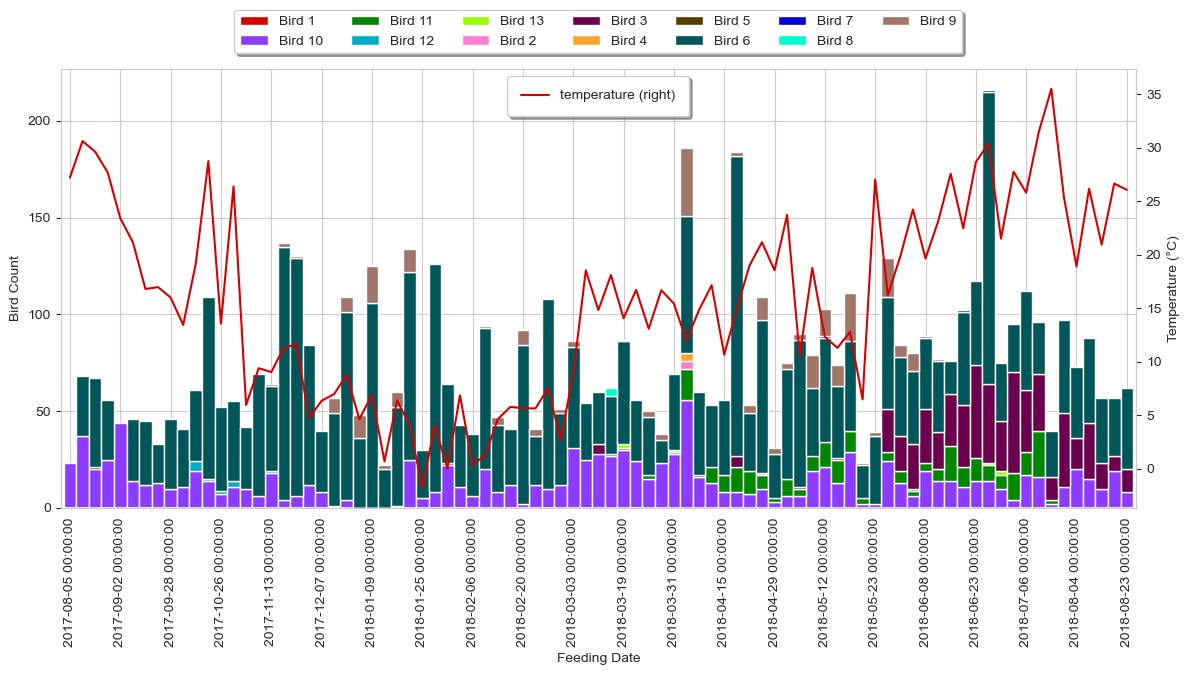

In [8]:
from datetime import datetime

# Create a new 'feeding_day' column by extracting the date from 'feeding_dt'
df['feeding_day'] = df['feeding_dt'].dt.floor('d')

# Calculate the mean temperature for each unique feeding day
mean_temp_day = df.groupby('feeding_day')['temperature'].mean()

# Convert the result to a DataFrame
mean_temp_day = pd.DataFrame(mean_temp_day)

# Create a cross-tabulation of bird counts by feeding day
birdcount_day = pd.crosstab(df['feeding_day'], df['bird'])

# Reset the index of 'mean_temp_day' to make 'feeding_day' a column
mean_temp_day.reset_index(inplace=True)

# Merge the two DataFrames based on the 'feeding_day' column
combined_df = mean_temp_day.merge(birdcount_day, on='feeding_day')

# Set 'feeding_day' as the index of the combined DataFrame
combined_df.set_index('feeding_day', inplace=True)

# Create a stacked bar chart for bird counts and a line chart for temperature
ax1 = combined_df.iloc[:, 1:14].plot(kind='bar', stacked=True, width=1, figsize=(12, 7))
ax2 = combined_df.iloc[:, 0].plot(kind='line', secondary_y=True, use_index=False)

# Customize the legends for the two y-axes
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True, ncol=7)
ax2.legend(loc='upper center', fancybox=True, shadow=True, borderpad=1)

# Remove the x-axis label
ax1.set_xlabel('Feeding Date')
ax1.set_xticks(range(0, len(combined_df), 4))
ax1.tick_params(axis='x', rotation=90)

# Set y-axis labels
ax1.set_ylabel("Bird Count")
ax2.set_ylabel("Temperature (°C)")

# Display the plot with improved layout
plt.tight_layout()
plt.show()


### Birds' Stay Duration at the Feeding Station Over Time

In our quest to understand whether different bird species were gradually spending more time at the feeding station, potentially indicating a sense of familiarity and security, an analysis of the median duration of bird observations during each feeding instance we conducted. It's worth noting that only bird species with more than 20 observations were included in this analysis.

Here are the key findings:

   - Lack of Clear Trends: Upon careful examination of the data, no discernible trends indicating significant changes in the duration of time birds spend at the feeding station over the observed period could be identified.

   - Possible Slight Trend for Bird 3 and 10: While the data did not reveal significant shifts in bird behavior, there was a subtle suggestion of a potential increase in the duration of stay for Bird 3 and 10. However, the dataset may not be robust enough to draw definitive conclusions.

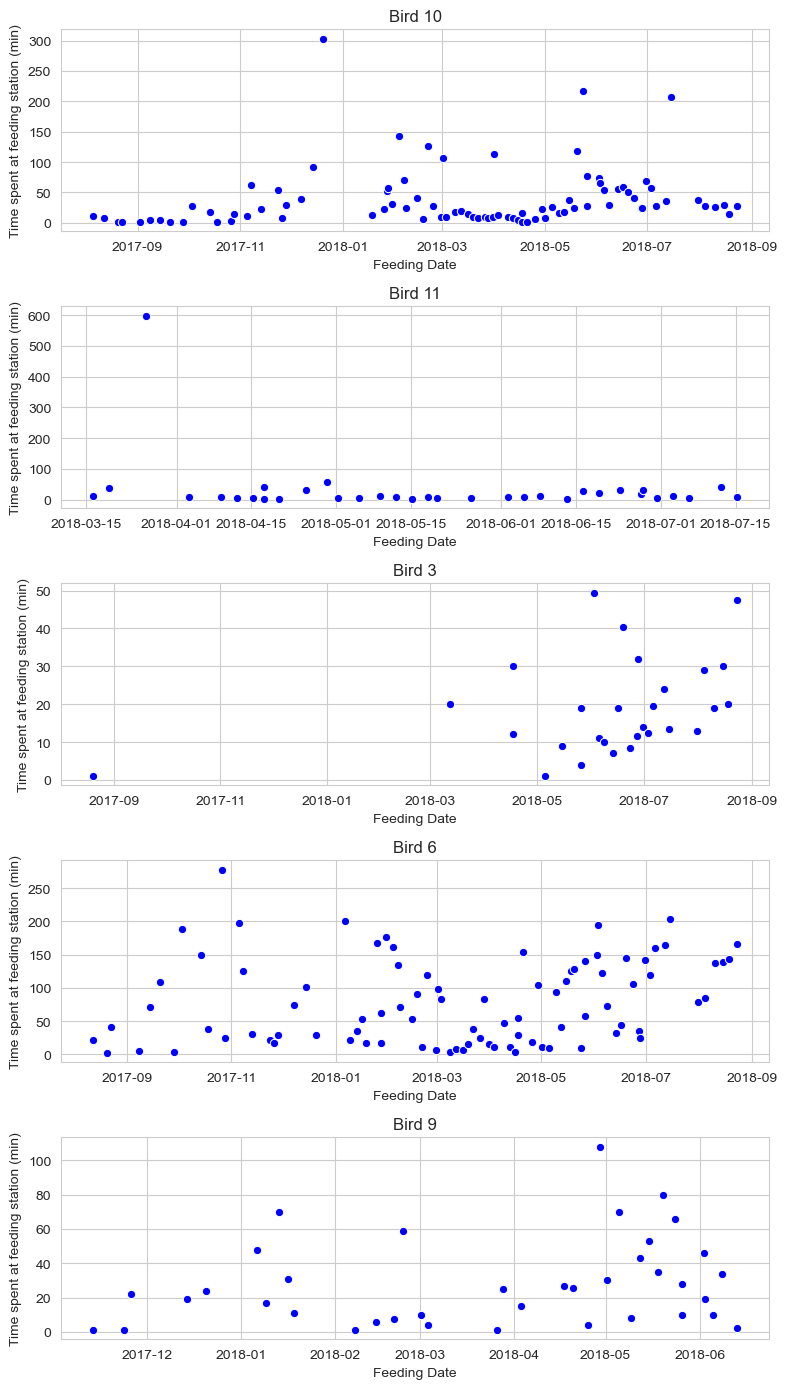

In [9]:
# Create a pivot table to summarize data by 'feeding_dt' (dates) and 'bird', calculating the median 'duration'
pivot = pd.pivot_table(filtered_df, values='duration', index='feeding_dt', columns='bird', aggfunc='median', margins=False)

# Create a subplot with 5 rows and 1 column, setting the figure size
fig, axes = plt.subplots(5, 1, figsize=(8, 14))

# Iterate through columns (bird species) in the pivot table
for i, column in enumerate(pivot.columns):
    # Create a line plot for each bird's duration over time
    sns.lineplot(x=pivot.index, y=pivot[column], ax=axes[i], marker='o', linestyle='None', color='b')
    
    # Set the title for the subplot based on the bird species
    axes[i].set_title(column)
    
    # Set the y-axis label
    axes[i].set_ylabel('Time spent at feeding station (min)')
    
    # Set the x-axis label
    axes[i].set_xlabel('Feeding Date')

# Adjust the layout for better visualization
plt.tight_layout()

# Display the plot
plt.show()

### Time to locate food at Feeding Station

An analysis was conducted to assess the duration it took each bird species to locate food at the feeding station following each feeding instance. This analysis focused on calculating the median time gap between observations and the feeding event. and then plotting this value over time. It is pertinent to note that only bird species with more than 20 observations were considered in this investigation.

Key findings from this analysis include:

   - Bird 11, Bird 3, Bird 6, and Bird 9: No significant trends were discerned that would suggest noteworthy alterations in the time required for these bird species to discover food at the feeding station once it had been replenished. Their behavior appeared relatively consistent throughout the observation period.

   - Bird 10: Interestingly, there appeared to be a subtle trend indicating a potential reduction in the time it takes Bird 10 to reach the food after it has been placed at the feeding station. However, this observation merits further examination.

While the results did not reveal substantial changes in behavior, the observed trend in Bird 10's food discovery time presents an area of interest for future research into the feeding patterns of this specific bird species.

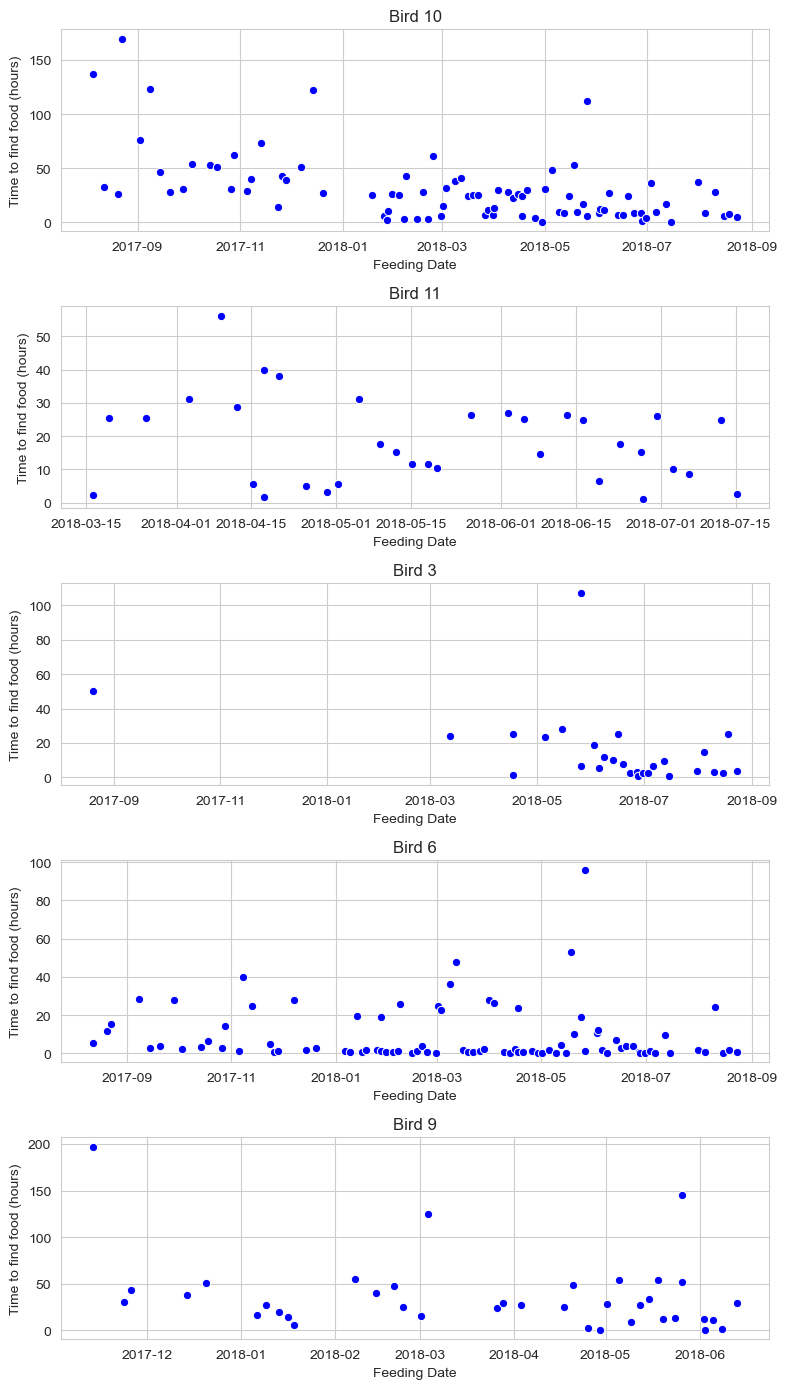

In [10]:

df_copy['feeding_timegap_hours'] = df_copy['feeding_timegap'].apply(lambda x: ((x.total_seconds() / 60) / 60))
filtered_df = df_copy[df_copy['bird'].map(df['bird'].value_counts()) > min_observation_count]

pivot = pd.pivot_table(filtered_df, values='feeding_timegap_hours', index='feeding_dt', columns='bird', aggfunc='median', margins=False)

fig, axes = plt.subplots(5, 1, figsize=(8, 14))

for i, column in enumerate(pivot.columns):
    sns.lineplot(x=pivot.index, y=pivot[column], ax=axes[i], marker='o', linestyle='None', color='b')
    axes[i].set_title(column)
    axes[i].set_ylabel('Time to find food (hours)')
    axes[i].set_xlabel('Feeding Date')

plt.tight_layout()
plt.show()

### Food Removal Behavior of Bird 3 Over Time

To investigate the potential connection between food removal from the feeding station and the breeding season, we examined the seasonality of this behavior among bird species. The initial step involved identifying which bird species took food away with them, narrowing our focus to those specific birds. Notably, only Bird 3 and Bird 11 were observed engaging in this behavior. However, Bird 11 had just one instance of taking food, so our analysis focused exclusively on Bird 3.

Our analysis aimed to determine whether Bird 3's food removal exhibited any seasonality. We accomplished this by creating a stacked bar chart that plotted the counts of observations in which Bird 3 either took food or did not take food over time.

Bird 3 was observed taking food exclusively during the period spanning from early June to mid-July. These results strongly suggest that during this timeframe, Bird 3 was actively involved in feeding its chicks. These insights shed light on the connection between bird behavior and potential breeding activities, offering valuable information about the feeding habits of Bird 3 during specific periods of the year.

In [11]:
df[df['food_taken'] == True]['bird'].value_counts()

Bird 3     125
Bird 11      1
Bird 1       0
Bird 10      0
Bird 12      0
Bird 13      0
Bird 2       0
Bird 4       0
Bird 5       0
Bird 6       0
Bird 7       0
Bird 8       0
Bird 9       0
Name: bird, dtype: int64

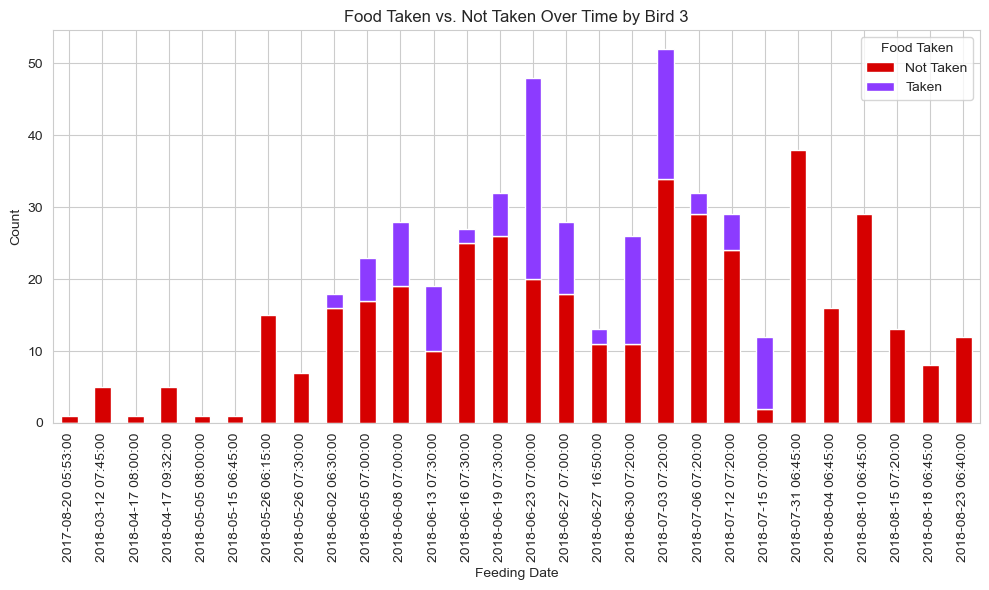

In [12]:
# Group by 'feeding_dt' and count the 'True' and 'False' values in 'food_taken' column
df3 = df[df['bird'] == 'Bird 3']
other = df3.groupby('feeding_dt')['food_taken'].value_counts().unstack().fillna(0)

# Create the stacked bar chart
other.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set labels and title
plt.xlabel('Feeding Date')
plt.ylabel('Count')
plt.title('Food Taken vs. Not Taken Over Time by Bird 3')

# Show the legend
plt.legend(title='Food Taken', loc='upper right', labels=['Not Taken', 'Taken'])

# Display the plot
plt.tight_layout()
plt.show()